# Data Preprocessing

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm
import seaborn as sns
from sklearn.metrics import accuracy_score


from tensorflow import keras
from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Flatten, InputLayer, Reshape, BatchNormalization, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline


In [16]:
# Dict of categories


categories = {
    'buildings': 0,
    'forest': 1,
    'glacier': 2,
    'mountain': 3,
    'sea': 4,
    'street': 5
}


categoriesInd = {
    0 : 'buildings',
    1 : 'forest',
    2 : 'glacier',
    3 : 'mountain',
    4 : 'sea',
    5 : 'street'
}
BATCH_SIZE = 16
EPOCHS = 30
IMG_SIZE = (-1 ,64, 64, 3)
img_size = (64, 64)
images_train_folder = os.path.join('../', 'intel-image-classification', 'seg_train')
images_test_folder = os.path.join('../', 'intel-image-classification', 'seg_test')
images_pred_folder = os.path.join('../', 'intel-image-classification', 'seg_pred', 'seg_pred')



In [3]:
def build_cnn_model():
    cnn_model=tf.keras.Sequential([
      Conv2D(filters=16,kernel_size=(3,3),activation='relu', \
             input_shape=intel_train_images.shape[1:]),
      MaxPooling2D((2,2), padding='same'),
      BatchNormalization(),
      Dropout(0.4),

      Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'),
      Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'),
      MaxPooling2D((2,2), padding='same'),
      BatchNormalization(),
      Dropout(0.4),

      Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'),
      Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'),
      MaxPooling2D((2,2), padding='same'),
      BatchNormalization(),
      Dropout(0.4),
        
      Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same'),
      Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same'),
      MaxPooling2D((2,2), padding='same'),
      BatchNormalization(),
      Dropout(0.4),
        

      Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'),
      Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'),
      MaxPooling2D((2,2), padding='same'),
      BatchNormalization(),
      Dropout(0.4),
        
      Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'),
      Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'),
      MaxPooling2D((2,2), padding='same'),
        
      BatchNormalization(),
      Dropout(0.4),
      Flatten(),

      Dense(units=len(categories),activation='relu')
    ])

    return cnn_model

In [4]:
def load_images(images_folder, img_size = (64,64), scale=True, pred_set=False):
    image_path = []
    for dirname, _, filenames in os.walk(images_folder):
        for filename in filenames:
            image_path.append(os.path.join(dirname, filename))

    print("There are {} images in {}".format(len(image_path), images_folder))
    images = []
    labels = []

    for path in tqdm.tqdm(image_path):
        img = cv2.imread(path, cv2.IMREAD_COLOR)    
        img = cv2.resize(img, img_size)
        img = np.array(img)
        images.append(img)
        if not pred_set:
            labels.append(categories[path.split('/')[-2]])
    images = np.array(images)  
    images = images.astype(np.int64)
    
    if scale:
        images = images / 255
        
    return image_path, images, np.asarray(labels)

In [5]:
image_path, intel_train_images, y_train = load_images(images_train_folder, img_size=img_size)
intel_train_images = np.array(intel_train_images).reshape(IMG_SIZE)

_, X_test, y_test = load_images(images_test_folder, img_size=img_size)
X_test = np.array(X_test).reshape(IMG_SIZE)

_, X_pred, y_pred = load_images(images_pred_folder, img_size=img_size, scale=True, pred_set=True)
X_pred = np.array(X_pred).reshape(IMG_SIZE)

  1%|          | 116/14034 [00:00<00:12, 1158.86it/s]

There are 14034 images in ../intel-image-classification/seg_train


  3%|▎         | 82/3000 [00:00<00:03, 813.38it/s]

There are 3000 images in ../intel-image-classification/seg_test


  1%|▏         | 102/7301 [00:00<00:07, 1015.25it/s]

There are 7301 images in ../intel-image-classification/seg_pred/seg_pred


100%|██████████| 7301/7301 [00:05<00:00, 1296.92it/s]


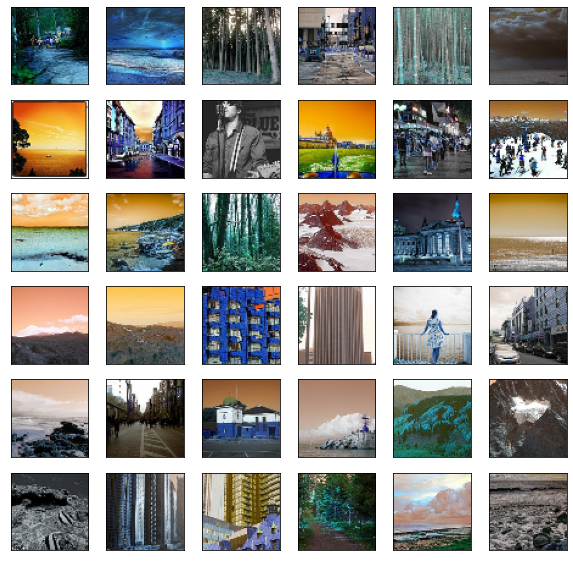

In [6]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(len(image_path),36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(intel_train_images[image_ind]))

## BUILD CNN MODEL

In [7]:
# try:
model = tf.keras.models.load_model("./intel_image_classifier_relu23.h5")
# except:
#     model = build_cnn_model()
    
print(model.summary())
# tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
checkpoint_filepath = './checkpoints/checkpoint_colors.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_freq=56300)
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10, 
    min_delta=0.001, 
    mode='max',
    restore_best_weights=True
)

In [13]:
history = model.fit(intel_train_images, y_train, 
                    batch_size = BATCH_SIZE, 
                    epochs = EPOCHS, 
                    verbose = 1, 
                    validation_data = (X_test, y_test),
                    callbacks=[model_checkpoint_callback, early_stopping])


Epoch 1/30
878/878 [==============================] - 52s 59ms/step - loss: 0.3703 - accuracy: 0.8774 - val_loss: 0.3704 - val_accuracy: 0.8787
Epoch 2/30
878/878 [==============================] - 58s 66ms/step - loss: 0.3638 - accuracy: 0.8783 - val_loss: 0.4344 - val_accuracy: 0.8520
Epoch 3/30
878/878 [==============================] - 57s 65ms/step - loss: 0.3528 - accuracy: 0.8839 - val_loss: 0.3784 - val_accuracy: 0.8737
Epoch 4/30
878/878 [==============================] - 56s 64ms/step - loss: 0.3524 - accuracy: 0.8827 - val_loss: 0.4568 - val_accuracy: 0.8487
Epoch 5/30
878/878 [==============================] - 57s 65ms/step - loss: 0.3901 - accuracy: 0.8706 - val_loss: 0.3874 - val_accuracy: 0.8707
Epoch 6/30
878/878 [==============================] - 57s 65ms/step - loss: 0.3337 - accuracy: 0.8898 - val_loss: 0.3890 - val_accuracy: 0.8703
Epoch 7/30
878/878 [==============================] - 57s 65ms/step - loss: 0.3286 - accuracy: 0.8935 - val_loss: 0.4409 - val_accuracy:

### Save model

In [14]:
model.save("intel_image_classifier_rgb.h5")

## Visiualize training history

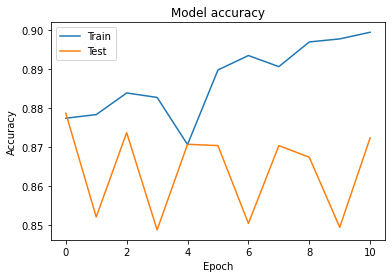

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

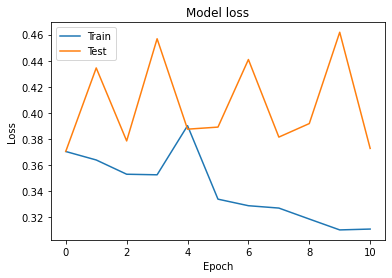

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

## PREDICTION BLOCK

In [17]:
def predict_class(img):
    img = img.reshape(IMG_SIZE)
    predictions = model.predict(img)
    true_prediction = [tf.argmax(pred) for pred in predictions]
    true_prediction = np.array(true_prediction)
    return list(categories.keys())[list(categories.values()).index(true_prediction)]
    

In [18]:
model_preds = model.predict(X_test)
model_preds=np.argmax(model_preds,axis=1)
accuracy_score(y_test, model_preds)

0.8786666666666667

### Visualize some predictions

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(X_pred.shape[0],36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(X_pred[image_ind]))
    label = predict_class(X_pred[image_ind])
    plt.xlabel(label)

In [31]:
img = X_test[0].reshape(IMG_SIZE)
predictions = model.predict(img)
true_prediction = [tf.argmax(pred) for pred in predictions]
true_prediction = np.array(true_prediction)
list(categories.keys())[list(categories.values()).index(true_prediction)]

'buildings'

# Adversarial Attcks 

In [138]:
EPS = 0.2
LR = 0.1

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.losses import SparseCategoricalCrossentropy

optimizer = Adam()
sccLoss = SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.SUM,from_logits=True)

def clip_eps(tensor, eps):
    return tf.clip_by_value(tensor, clip_value_min=-eps, clip_value_max=eps)


def generate_adversaries(model, baseImage, delta, ind, steps=50):
    for step in range(0, steps):
        with tf.GradientTape() as tape:
            
            tape.watch(delta)
            img = baseImage + delta
            adversary = preprocess_input(img)
            predictions = model(adversary, training=False)
            
            loss = -sccLoss(tf.convert_to_tensor(categories[ind]), predictions)
            
            if step % 10 == 0:
                print("step: {}, loss: {}...".format(step,
                                                     loss.numpy()))
            gradients = tape.gradient(loss, delta)
            optimizer.apply_gradients([(gradients, delta)])
            delta = delta.assign_add(clip_eps(delta, eps=EPS))
    return delta


image = preprocess_input(X_test[0])

baseImage = image.reshape(IMG_SIZE)

predictions = model.predict(baseImage)
score = tf.nn.softmax(predictions[0])
print(predictions, categoriesInd[np.argmax(score)])

baseImage = tf.constant(baseImage, dtype=tf.float32)

delta = tf.Variable(tf.zeros_like(baseImage), trainable=True)
print("[INFO] generating perturbation...")

deltaUpdated = generate_adversaries(model, baseImage, delta, 'buildings')

adverImage = (baseImage + deltaUpdated).numpy().squeeze()

adverImage = np.clip(adverImage, 0, 255).astype("uint8")
adverImage = cv2.cvtColor(adverImage, cv2.COLOR_RGB2BGR)

cv2.imwrite("adversarial.png", adverImage)

image = cv2.imread("adversarial.png",  cv2.IMREAD_COLOR)
img = cv2.resize(image, img_size)
img = np.array(img)
img = img.reshape(-1, 64, 64, 3)

preprocessedImage = preprocess_input(baseImage + deltaUpdated)

img = np.array(preprocessedImage)     
# preprocessedImage = img.reshape(IMG_SIZE)
                                                                                                                    
predictions = model.predict(img)
score = tf.nn.softmax(predictions[0])
print(predictions, score)
categoriesInd[np.argmax(score)]

[[  744.07166    100.311676 -1392.6368    -576.8576    -752.9644
    341.87625 ]] buildings
[INFO] generating perturbation...
step: 0, loss: -1277.546142578125...
step: 10, loss: -1352.905029296875...
step: 20, loss: -1497.1806640625...
step: 30, loss: -1640.522216796875...
step: 40, loss: -1784.4365234375...
[[  352.55228  2278.8975  -2247.6045  -2739.1655  -3516.5347   -718.29987]] tf.Tensor([0. 1. 0. 0. 0. 0.], shape=(6,), dtype=float32)


'forest'

In [116]:

image = cv2.imread("adversarial.png",  cv2.IMREAD_COLOR)
# img = cv2.imread(path, cv2.IMREAD_COLOR)    
img = cv2.resize(image, img_size)
img = np.array(img)
img = img.reshape(-1, 64, 64, 3)

predictions = model.predict(img)
score = tf.nn.softmax(predictions[0])
print(predictions, score)
categoriesInd[np.argmax(score)]
# preprocessedImage = preprocess_input(baseImage + deltaUpdated)
# predictions = model.predict(preprocessedImage)


# true_prediction = [tf.argmax(pred) for pred in predictions]
# true_prediction = np.array(true_prediction)
# list(categories.keys())[list(categories.values()).index(true_prediction)]

[[-4.1205387   0.32785562 -2.3694015  -1.1538609  -1.616805   -0.48324218]] tf.Tensor([0.00617684 0.5280555  0.03558572 0.11999918 0.07553082 0.234652  ], shape=(6,), dtype=float32)


'forest'